In [320]:
import pandas as pd
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,MultiComparison)
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.api as sm

In [238]:

df_per = pd.read_csv('~/Desktop/PerformanceMeasure.csv')
df_well = pd.read_csv('~/Desktop/WellnessMeasure.csv')
df_rpe = pd.read_csv('~/Desktop/rpe_final.csv')

print(df_per.shape)
print(df_well.shape)
print(df_rpe.shape)
df_rpe.head()

(482, 9)
(5011, 8)
(7192, 12)


,Unnamed: 0,Date,PlayerID,SessionType,Duration,RPE,SessionLoad,DailyLoad,AcuteLoad,ChronicLoad,AcuteChronicRatio,Load Status
0,0,2017-08-01,1,Speed,60.0,3.0,180.0,540.0,77.1,19.29,4.00,high
1,1,2017-08-01,1,Strength,90.0,4.0,360.0,540.0,77.1,19.29,4.00,high
2,2,2017-08-01,3,Speed,45.0,5.0,225.0,675.0,96.4,24.11,4.00,high
3,3,2017-08-01,3,Strength,90.0,5.0,450.0,675.0,96.4,24.11,4.00,high
4,4,2017-08-01,5,Speed,30.0,3.0,90.0,330.0,47.1,11.79,3.99,high


In [239]:

#dfPerformance = pd.merge(df_final_performance, df_games, left_on='GameID',right_on='GameID', how='left')
#dfPerformance
df_rpe.head()

,Unnamed: 0,Date,PlayerID,SessionType,Duration,RPE,SessionLoad,DailyLoad,AcuteLoad,ChronicLoad,AcuteChronicRatio,Load Status
0,0,2017-08-01,1,Speed,60.0,3.0,180.0,540.0,77.1,19.29,4.00,high
1,1,2017-08-01,1,Strength,90.0,4.0,360.0,540.0,77.1,19.29,4.00,high
2,2,2017-08-01,3,Speed,45.0,5.0,225.0,675.0,96.4,24.11,4.00,high
3,3,2017-08-01,3,Strength,90.0,5.0,450.0,675.0,96.4,24.11,4.00,high
4,4,2017-08-01,5,Speed,30.0,3.0,90.0,330.0,47.1,11.79,3.99,high


In [240]:
from datetime import datetime  
from datetime import timedelta

fmt = '%Y-%m-%d'
df_per["train_date"]  = (pd.to_datetime(df_per["Date"], format=fmt) - pd.Timedelta('1 days')).dt.strftime(date_format=fmt)
df_per.head()

,GameID,Date,PlayerID,AccelImpulse,AccelLoad,Speed,PerformanceScore,Outcome,PointsDiff,train_date
0,1,2017-11-30,2,0.524367,0.264378,0.754193,51.431257,W,19,2017-11-29
1,2,2017-11-30,2,0.524367,0.264378,0.754193,51.431257,W,31,2017-11-29
2,3,2017-11-30,2,0.524367,0.264378,0.754193,51.431257,W,17,2017-11-29
3,1,2017-11-30,3,0.452520,0.333518,0.753256,51.309794,W,19,2017-11-29
4,2,2017-11-30,3,0.452520,0.333518,0.753256,51.309794,W,31,2017-11-29


In [241]:
df = pd.merge(df_rpe, df_per,  how='left',left_on=['Date','PlayerID'],right_on=["train_date",'PlayerID'])

In [242]:
df = df.dropna()

In [243]:
df.head()

,Unnamed: 0,Date_x,PlayerID,SessionType,Duration,RPE,SessionLoad,DailyLoad,AcuteLoad,ChronicLoad,...,Load Status,GameID,Date_y,AccelImpulse,AccelLoad,Speed,PerformanceScore,Outcome,PointsDiff,train_date
2690,2690,2017-11-29,2,Skills,90.0,4.0,360.0,360.0,181.4,365.54,...,recovering,1.0,2017-11-30,0.524367,0.264378,0.754193,51.431257,W,19.0,2017-11-29
2691,2690,2017-11-29,2,Skills,90.0,4.0,360.0,360.0,181.4,365.54,...,recovering,2.0,2017-11-30,0.524367,0.264378,0.754193,51.431257,W,31.0,2017-11-29
2692,2690,2017-11-29,2,Skills,90.0,4.0,360.0,360.0,181.4,365.54,...,recovering,3.0,2017-11-30,0.524367,0.264378,0.754193,51.431257,W,17.0,2017-11-29
2693,2691,2017-11-29,3,Skills,60.0,6.0,360.0,360.0,239.3,457.86,...,recovering,1.0,2017-11-30,0.452520,0.333518,0.753256,51.309794,W,19.0,2017-11-29
2694,2691,2017-11-29,3,Skills,60.0,6.0,360.0,360.0,239.3,457.86,...,recovering,2.0,2017-11-30,0.452520,0.333518,0.753256,51.309794,W,31.0,2017-11-29


In [244]:
df_final = pd.merge(df,df_well,how='left',left_on = ["train_date","PlayerID"],right_on = ["Date","PlayerID"])

In [245]:
df_final = df_final.dropna()

In [246]:
df_final.shape

(562, 28)

In [247]:
df_final.drop_duplicates()

,Unnamed: 0,Date_x,PlayerID,SessionType,Duration,RPE,SessionLoad,DailyLoad,AcuteLoad,ChronicLoad,...,Outcome,PointsDiff,train_date,Date,Pain,Illness,Menstruation,Nutrition,NutritionAdjustment,EWMScore
3,2691,2017-11-29,3,Skills,60.000000,6.0,360.0,360.0,239.3,457.86,...,W,19.0,2017-11-29,2017-11-29,No,No,No,Excellent,Yes,28.998389
4,2691,2017-11-29,3,Skills,60.000000,6.0,360.0,360.0,239.3,457.86,...,W,31.0,2017-11-29,2017-11-29,No,No,No,Excellent,Yes,28.998389
5,2691,2017-11-29,3,Skills,60.000000,6.0,360.0,360.0,239.3,457.86,...,W,17.0,2017-11-29,2017-11-29,No,No,No,Excellent,Yes,28.998389
6,2693,2017-11-29,6,Skills,60.000000,4.0,240.0,240.0,192.9,401.79,...,W,19.0,2017-11-29,2017-11-29,No,No,No,Excellent,Yes,28.182831
7,2693,2017-11-29,6,Skills,60.000000,4.0,240.0,240.0,192.9,401.79,...,W,31.0,2017-11-29,2017-11-29,No,No,No,Excellent,Yes,28.182831
8,2693,2017-11-29,6,Skills,60.000000,4.0,240.0,240.0,192.9,401.79,...,W,17.0,2017-11-29,2017-11-29,No,No,No,Excellent,Yes,28.182831
9,2694,2017-11-29,7,Skills,75.000000,5.0,375.0,375.0,156.4,496.25,...,W,19.0,2017-11-29,2017-11-29,No,No,No,Excellent,Yes,27.882338
10,2694,2017-11-29,7,Skills,75.000000,5.0,375.0,375.0,156.4,496.25,...,W,31.0,2017-11-29,2017-11-29,No,No,No,Excellent,Yes,27.882338
11,2694,2017-11-29,7,Skills,75.000000,5.0,375.0,375.0,156.4,496.25,...,W,17.0,2017-11-29,2017-11-29,No,No,No,Excellent,Yes,27.882338
12,2695,2017-11-29,8,Skills,60.000000,4.0,240.0,240.0,137.1,466.96,...,W,19.0,2017-11-29,2017-11-29,No,No,No,Excellent,Yes,30.776928


In [269]:
df_final.drop(columns=["Date_x"])
df_final.rename(columns = {"Date_y":"game_date",'Load Status':"Load_Status"},inplace=True)
df_final.columns

Index(['Unnamed: 0', 'Date_x', 'PlayerID', 'SessionType', 'Duration', 'RPE',
       'SessionLoad', 'DailyLoad', 'AcuteLoad', 'ChronicLoad',
       'AcuteChronicRatio', 'Load_Status', 'GameID', 'game_date',
       'AccelImpulse', 'AccelLoad', 'Speed', 'PerformanceScore', 'Outcome',
       'PointsDiff', 'train_date', 'Date', 'Pain', 'Illness', 'Menstruation',
       'Nutrition', 'NutritionAdjustment', 'EWMScore'],
      dtype='object')

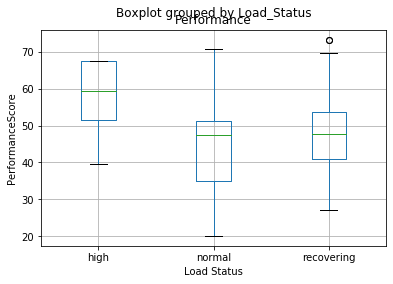

In [271]:
df_final.boxplot(column = 'PerformanceScore', by = "Load_Status")
plt.title('Performance')  
plt.xlabel('Load Status')  
plt.ylabel('PerformanceScore')  
plt.show()

As shown in the boxplot, we can see significant difference for high training load. For a Player that did high load train a day before game, most likely they will perform better.

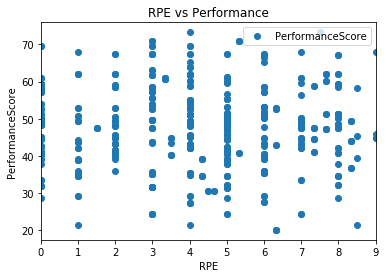

In [272]:
df_final.plot(x='RPE', y='PerformanceScore', style='o') 
plt.title('RPE vs Performance')  
plt.xlabel('RPE')  
plt.ylabel('PerformanceScore')  
plt.show()

From here, we may not see any pattern or trend for RPE vs Performance

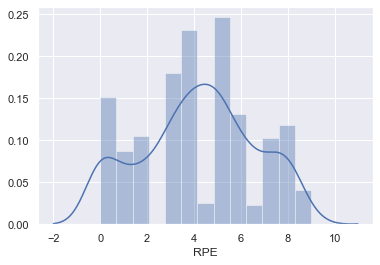

In [273]:
import seaborn as sns; sns.set()
sns.distplot(df_final.RPE)
plt.show()

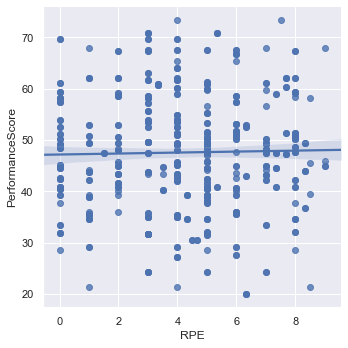

In [274]:
sns.lmplot(x = "RPE", y = "PerformanceScore", data = df_final)

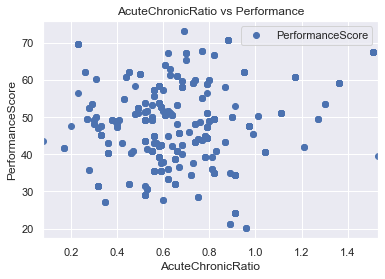

In [275]:
df_final.plot(x='AcuteChronicRatio', y='PerformanceScore', style='o') 
plt.title('AcuteChronicRatio vs Performance')  
plt.xlabel('AcuteChronicRatio')
plt.ylabel('PerformanceScore')  
plt.show()

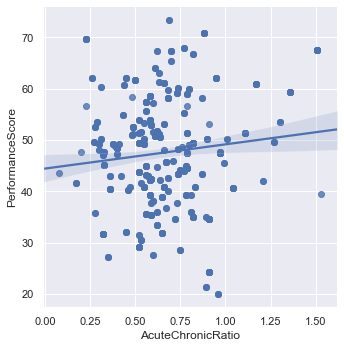

In [276]:
sns.lmplot(x = "AcuteChronicRatio", y = "PerformanceScore", data = df_final)

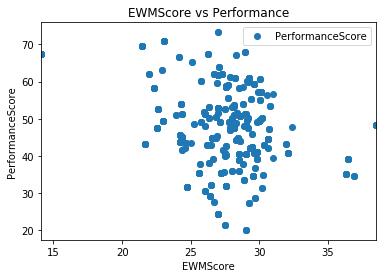

In [255]:

df_final.plot(x='EWMScore', y='PerformanceScore', style='o') 
plt.title('EWMScore vs Performance')  
plt.xlabel('EWMScore')  
plt.ylabel('PerformanceScore')  
plt.show()

In [256]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
formula = "PerformanceScore  ~  Load_Status + EWMScore + RPE + SessionType + Pain + Illness +Menstruation +  PointsDiff + AcuteChronicRatio+ Outcome + NutritionAdjustment"
full_model = smf.ols(formula, data = df_final).fit()
print(full_model.summary())



                            OLS Regression Results                            
Dep. Variable:       PerformanceScore   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     7.941
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           9.35e-19
Time:                        22:12:59   Log-Likelihood:                -2068.3
No. Observations:                 562   AIC:                             4175.
Df Residuals:                     543   BIC:                             4257.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [258]:
formula = "PerformanceScore  ~ Load_Status+ EWMScore + Pain + Illness + PointsDiff + AcuteChronicRatio "
model5 = smf.ols(formula, data = df_final).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:       PerformanceScore   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     16.80
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.08e-22
Time:                        22:13:03   Log-Likelihood:                -2072.8
No. Observations:                 562   AIC:                             4164.
Df Residuals:                     553   BIC:                             4203.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

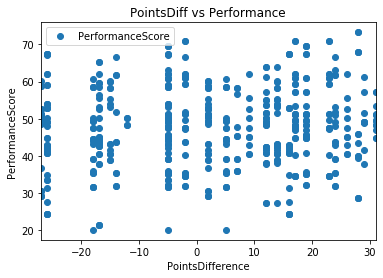

In [259]:

df_final.plot(x='PointsDiff', y='PerformanceScore', style='o') 
plt.title('PointsDiff vs Performance')  
plt.xlabel('PointsDifference')  
plt.ylabel('PerformanceScore')  
plt.show()

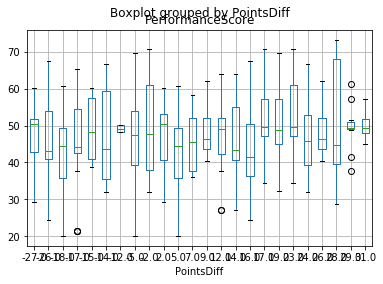

In [260]:
df_final.boxplot(column = 'PerformanceScore', by = "PointsDiff")

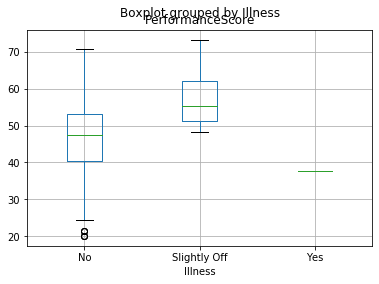

In [261]:
df_final.boxplot(column = 'PerformanceScore', by = "Illness")

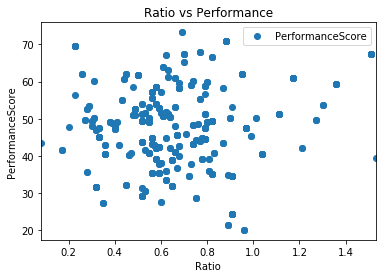

In [262]:
df_final.plot(x='AcuteChronicRatio', y='PerformanceScore', style='o') 
plt.title('Ratio vs Performance')  
plt.xlabel('Ratio')  
plt.ylabel('PerformanceScore')

# poly1d_fn is now a function which takes in x and returns an estimate for y


plt.show()

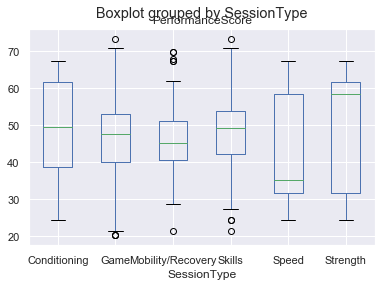

In [277]:
df_final.boxplot(column = 'PerformanceScore', by = "SessionType")

In [279]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,MultiComparison)
pairwise_tukeyhsd(df_final["RPE"],df_final["SessionType"]).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Conditioning,Game,1.3343,0.0067,0.2429,2.4257,True
Conditioning,Mobility/Recovery,-4.2415,0.001,-5.3511,-3.132,True
Conditioning,Skills,-0.6381,0.5338,-1.7182,0.4421,False
Conditioning,Speed,-1.8333,0.0095,-3.3775,-0.2892,True
Conditioning,Strength,-0.5333,0.9,-1.992,0.9253,False
Game,Mobility/Recovery,-5.5758,0.001,-6.0462,-5.1055,True
Game,Skills,-1.9724,0.001,-2.3683,-1.5764,True
Game,Speed,-3.1676,0.001,-4.3401,-1.9952,True
Game,Strength,-1.8676,0.001,-2.9249,-0.8104,True
Mobility/Recovery,Skills,3.6035,0.001,3.16,4.047,True


In [280]:
pairwise_tukeyhsd(df["PerformanceScore"],df["SessionType"]).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Conditioning,Game,-1.8356,0.9,-10.3975,6.7264,False
Conditioning,Mobility/Recovery,-2.4918,0.9,-11.1961,6.2125,False
Conditioning,Skills,-0.5395,0.9,-9.005,7.9259,False
Conditioning,Speed,-5.3346,0.7815,-17.4486,6.7793,False
Conditioning,Strength,-1.7092,0.9,-13.1523,9.7339,False
Game,Mobility/Recovery,-0.6562,0.9,-4.3459,3.0334,False
Game,Skills,1.296,0.8147,-1.7882,4.3802,False
Game,Speed,-3.499,0.8802,-12.6966,5.6986,False
Game,Strength,0.1264,0.9,-8.1677,8.4205,False
Mobility/Recovery,Skills,1.9523,0.5774,-1.5075,5.4121,False


Mixed Effect Model

Since we have multiple rows for same player, these are dependent

Using Mixed effect models can avoid it

Reference: https://www.statsmodels.org/stable/mixed_linear.html

Linear Mixed Effects models are used for regression analyses involving dependent data. Such data arise when working with longitudinal and other study designs in which multiple observations are made on each subject. Some specific linear mixed effects models are

Random intercepts models, where all responses in a group are additively shifted by a value that is specific to the group.

Random slopes models, where the responses in a group follow a (conditional) mean trajectory that is linear in the observed covariates, with the slopes (and possibly intercepts) varying by group.

Variance components models, where the levels of one or more categorical covariates are associated with draws from distributions. These random terms additively determine the conditional mean of each observation based on its covariate values.

The assumptions, for a linear mixed effects model,

• The explanatory variables are related linearly to the response.

• The errors have constant variance.

• The errors are independent.

• The errors are Normally distributed.

In [264]:
import statsmodels.api as sm

import statsmodels.formula.api as smf

md = smf.mixedlm("PerformanceScore  ~ Load_Status + EWMScore + Pain + Illness + PointsDiff + AcuteChronicRatio ", df_final,groups = df_final["PlayerID"])
mdf = md.fit()
print(mdf.summary())

                Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   PerformanceScore
No. Observations:     562       Method:               REML            
No. Groups:           17        Scale:                62.0709         
Min. group size:      3         Likelihood:           -1972.0577      
Max. group size:      80        Converged:            Yes             
Mean group size:      33.1                                            
----------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
----------------------------------------------------------------------
Intercept                  61.143    6.959  8.787 0.000  47.504 74.781
Load_Status[T.normal]      -6.320    2.477 -2.551 0.011 -11.175 -1.465
Load_Status[T.recovering]  -4.528    3.000 -1.510 0.131 -10.408  1.351
Pain[T.Yes]                 3.648    1.885  1.936 0.053  -0.045  7.342
Illness[T.Slightly Off]

In [265]:
md = smf.mixedlm("PerformanceScore  ~  Load_Status + EWMScore + RPE + Pain + Illness +Menstruation + PointsDiff + AcuteChronicRatio+ Outcome ", df_final,groups = df_final["PlayerID"])
mdf = md.fit()
print(mdf.summary())

                Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   PerformanceScore
No. Observations:     562       Method:               REML            
No. Groups:           17        Scale:                61.7895         
Min. group size:      3         Likelihood:           -1967.8803      
Max. group size:      80        Converged:            Yes             
Mean group size:      33.1                                            
----------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
----------------------------------------------------------------------
Intercept                  62.895    7.071  8.894 0.000  49.036 76.755
Load_Status[T.normal]      -6.080    2.475 -2.456 0.014 -10.931 -1.229
Load_Status[T.recovering]  -4.056    3.004 -1.350 0.177  -9.943  1.832
Pain[T.Yes]                 3.530    1.886  1.872 0.061  -0.166  7.226
Illness[T.Slightly Off]

In [266]:
md = smf.mixedlm("PerformanceScore  ~  Load_Status + EWMScore +  Pain + Illness + PointsDiff + AcuteChronicRatio+ Outcome ", df_final,groups = df_final["PlayerID"])
mdf = md.fit()
print(mdf.summary())

                Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   PerformanceScore
No. Observations:     562       Method:               REML            
No. Groups:           17        Scale:                61.6409         
Min. group size:      3         Likelihood:           -1968.3751      
Max. group size:      80        Converged:            Yes             
Mean group size:      33.1                                            
----------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
----------------------------------------------------------------------
Intercept                  63.224    6.991  9.043 0.000  49.521 76.927
Load_Status[T.normal]      -6.159    2.469 -2.494 0.013 -10.999 -1.320
Load_Status[T.recovering]  -4.215    2.992 -1.409 0.159 -10.080  1.649
Pain[T.Yes]                 3.644    1.878  1.941 0.052  -0.036  7.325
Illness[T.Slightly Off]

In [319]:
md = smf.mixedlm("PerformanceScore  ~  Load_Status +  EWMScore +  Illness + PointsDiff + Outcome ", df_final,groups = df_final["PlayerID"])
mdf = md.fit()
print(mdf.summary())

                Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   PerformanceScore
No. Observations:     562       Method:               REML            
No. Groups:           17        Scale:                61.7607         
Min. group size:      3         Likelihood:           -1973.7029      
Max. group size:      80        Converged:            Yes             
Mean group size:      33.1                                            
----------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
----------------------------------------------------------------------
Intercept                  64.107    6.078 10.547 0.000  52.194 76.019
Load_Status[T.normal]      -6.899    2.093 -3.295 0.001 -11.002 -2.795
Load_Status[T.recovering]  -4.991    1.942 -2.570 0.010  -8.797 -1.184
Illness[T.Slightly Off]     5.103    1.799  2.836 0.005   1.577  8.629
Illness[T.Yes]         

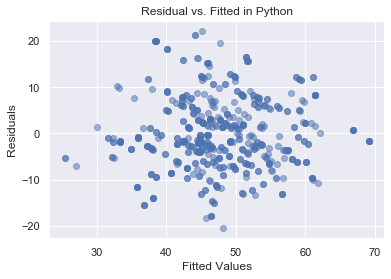

In [327]:
plt.scatter(df_final['PerformanceScore'] - mdf.resid, mdf.resid, alpha = 0.5)
plt.title("Residual vs. Fitted")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.savefig('python_plot.png',dpi=300)
plt.show()

In [295]:
#df_final["SessionType"]

Regression by Session Type


In [283]:
df_Skill = df_final.loc[df_final["SessionType"] == "Skills"]

In [285]:
md = smf.mixedlm("PerformanceScore  ~ Load_Status + EWMScore + Pain + Illness + PointsDiff + AcuteChronicRatio ", df_Skill,groups = df_Skill["PlayerID"])
mdf = md.fit()
print(mdf.summary())

                Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   PerformanceScore
No. Observations:     233       Method:               REML            
No. Groups:           14        Scale:                46.4549         
Min. group size:      3         Likelihood:           -781.6973       
Max. group size:      28        Converged:            Yes             
Mean group size:      16.6                                            
----------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
----------------------------------------------------------------------
Intercept                  50.870    9.122  5.577 0.000  32.991 68.748
Load_Status[T.normal]       0.862    4.350  0.198 0.843  -7.664  9.388
Load_Status[T.recovering]   5.334    4.863  1.097 0.273  -4.198 14.866
Pain[T.Yes]                 1.134    2.372  0.478 0.632  -3.514  5.783
Illness[T.Slightly Off]

In [286]:
md = smf.mixedlm("PerformanceScore  ~  EWMScore +  Illness + PointsDiff ", df_Skill,groups = df_Skill["PlayerID"])
mdf = md.fit()
print(mdf.summary())

               Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   PerformanceScore
No. Observations:   233       Method:               REML            
No. Groups:         14        Scale:                46.9772         
Min. group size:    3         Likelihood:           -790.2721       
Max. group size:    28        Converged:            Yes             
Mean group size:    16.6                                            
--------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
--------------------------------------------------------------------
Intercept                57.784    8.345  6.924 0.000  41.428 74.141
Illness[T.Slightly Off]   6.043    2.126  2.842 0.004   1.876 10.210
Illness[T.Yes]          -14.347    5.395 -2.659 0.008 -24.921 -3.773
EWMScore                 -0.352    0.286 -1.232 0.218  -0.912  0.208
PointsDiff                0.052    0.028  1.854 0.

In [288]:
df_Recovery = df_final.loc[df_final["SessionType"] == "Mobility/Recovery"]

In [289]:
md = smf.mixedlm("PerformanceScore  ~ Load_Status + EWMScore + Pain + Illness + PointsDiff + AcuteChronicRatio ", df_Recovery,groups = df_Recovery["PlayerID"])
mdf = md.fit()
print(mdf.summary())

                 Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    PerformanceScore
No. Observations:    118        Method:                REML            
No. Groups:          7          Scale:                 61.3537         
Min. group size:     5          Likelihood:            -405.3636       
Max. group size:     36         Converged:             Yes             
Mean group size:     16.9                                              
-----------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
-----------------------------------------------------------------------
Intercept                  81.678   14.757  5.535 0.000  52.755 110.602
Load_Status[T.normal]     -16.592    5.731 -2.895 0.004 -27.824  -5.359
Load_Status[T.recovering] -17.126    6.836 -2.505 0.012 -30.525  -3.728
Illness[T.Slightly Off]    -2.139    5.884 -0.364 0.716 -13.671   9.393
EWMScore 

In [290]:
df_Game = df_final.loc[df_final["SessionType"] == "Game"]
md = smf.mixedlm("PerformanceScore  ~ Load_Status + EWMScore + Pain + Illness + PointsDiff + AcuteChronicRatio ", df_Game,groups = df_Game["PlayerID"])
mdf = md.fit()
print(mdf.summary())

                Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   PerformanceScore
No. Observations:     170       Method:               REML            
No. Groups:           17        Scale:                71.3649         
Min. group size:      3         Likelihood:           -608.5273       
Max. group size:      19        Converged:            Yes             
Mean group size:      10.0                                            
----------------------------------------------------------------------
                          Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
----------------------------------------------------------------------
Intercept                 75.089   14.781  5.080 0.000  46.119 104.059
Load_Status[T.normal]     -3.302    4.110 -0.803 0.422 -11.357   4.753
Load_Status[T.recovering] -5.177    5.363 -0.965 0.334 -15.689   5.334
Pain[T.Yes]                4.776    5.271  0.906 0.365  -5.556  15.108
Illness[T.Slightly Off]

Regression by group does not look right

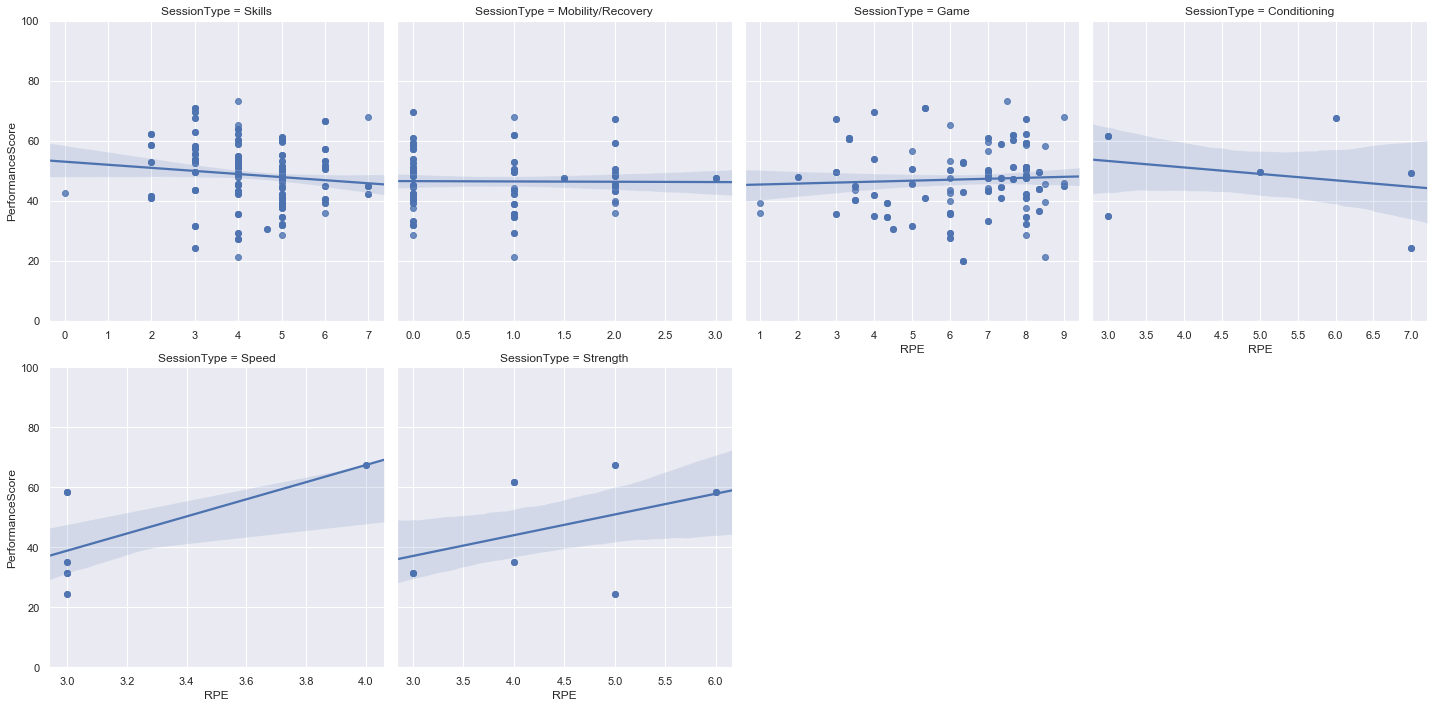

In [293]:
grid = sns.lmplot(x = "RPE", y = "PerformanceScore", col = "SessionType", sharex=False, data = df_final, col_wrap=4).set(ylim=(0,100))

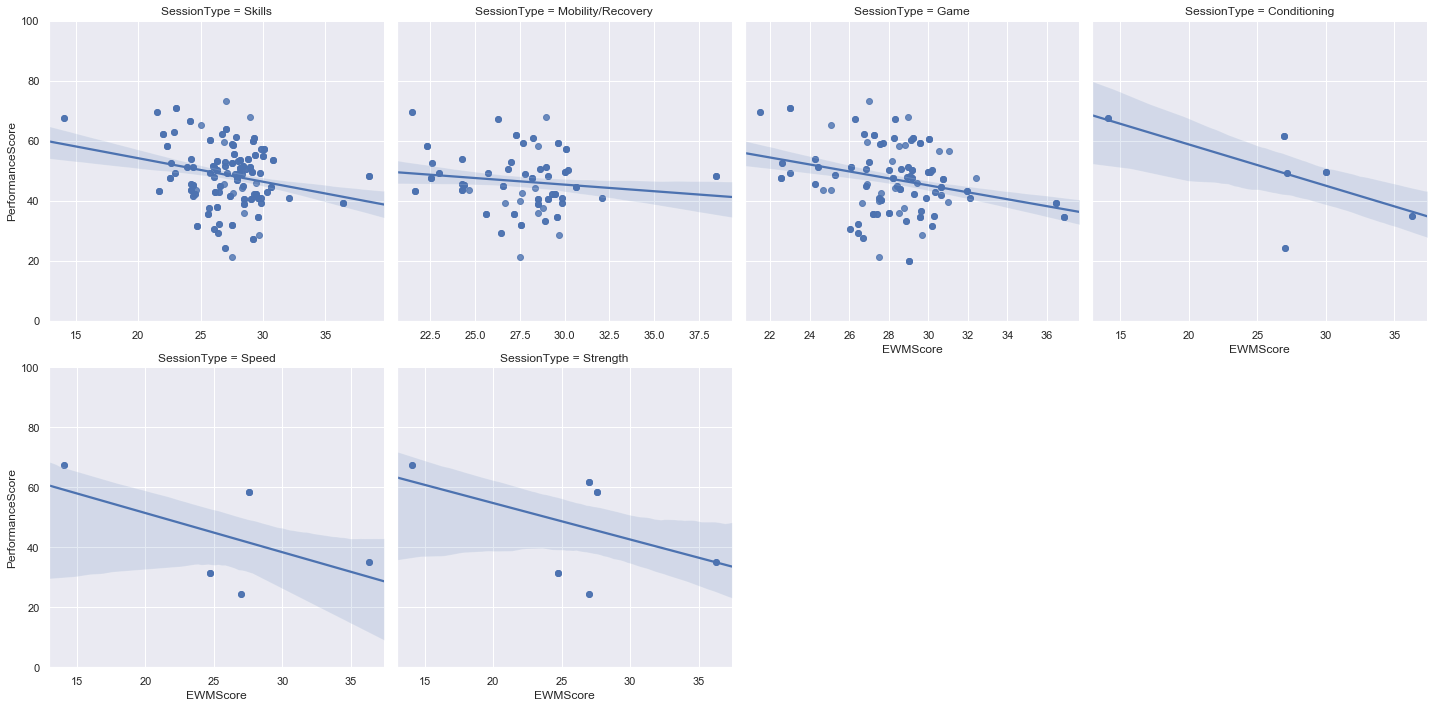

In [294]:
grid = sns.lmplot(x = "EWMScore", y = "PerformanceScore", col = "SessionType", sharex=False, data = df_final, col_wrap=4).set(ylim=(0,100))

In [298]:
df_final.columns

Index(['Unnamed: 0', 'Date_x', 'PlayerID', 'SessionType', 'Duration', 'RPE',
       'SessionLoad', 'DailyLoad', 'AcuteLoad', 'ChronicLoad',
       'AcuteChronicRatio', 'Load_Status', 'GameID', 'game_date',
       'AccelImpulse', 'AccelLoad', 'Speed', 'PerformanceScore', 'Outcome',
       'PointsDiff', 'train_date', 'Date', 'Pain', 'Illness', 'Menstruation',
       'Nutrition', 'NutritionAdjustment', 'EWMScore'],
      dtype='object')

In [311]:
df = df_final[['PerformanceScore','SessionType', 'Duration', 'RPE','AcuteChronicRatio', 'Load_Status','AccelImpulse',
               'AccelLoad', 'Speed','Outcome',
       'PointsDiff', 'Pain', 'Illness', 'Menstruation',
       'Nutrition', 'NutritionAdjustment', 'EWMScore']]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

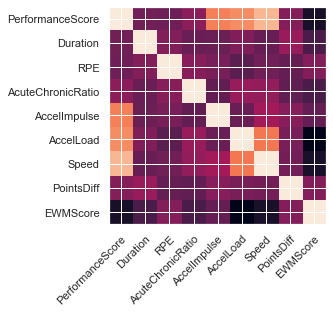

In [312]:
# get correlation matrix
corr = df.corr()
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

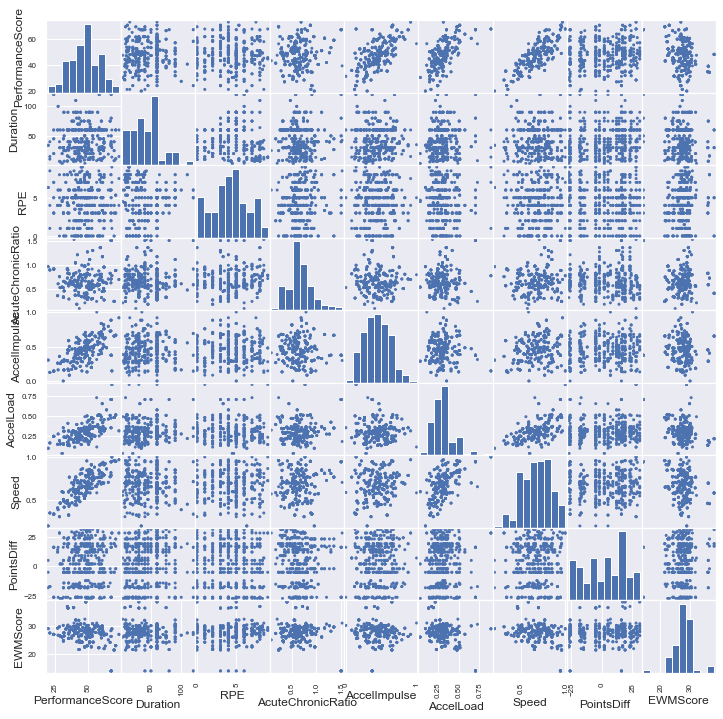

In [313]:

from pandas.plotting import scatter_matrix

fig, ax = plt.subplots(figsize=(12,12))
scatter_matrix(df, alpha=1, ax=ax)
plt.show()

In [316]:
df_final["SessionType"].count()

562

In [317]:
df_final.groupby(df_final["SessionType"])["SessionType"].count()

SessionType
Conditioning          14
Game                 170
Mobility/Recovery    118
Skills               233
Speed                 12
Strength              15
Name: SessionType, dtype: int64

Interesting Try

1. Predict game result(W or L) by using training load, performance, and wellness
2. Time series analysis
3. 